# TIME SERIES WITH EDA


In [3]:
## Install Pandas Data Reader (helps in reading financial data)
!pip install pandas-datareader

In [9]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

!pip install yfinance

import numpy as np
import yfinance as yfin
yfin.pdr_override()

df_tesla = yfin.download('TSLA')

  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.3
    Uninstalling lxml-4.6.3:
      Successfully uninstalled lxml-4.6.3
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


[*********************100%***********************]  1 of 1 completed


In [10]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-02-07,196.429993,197.500000,189.550003,196.809998,196.809998,186010300
2023-02-08,196.100006,203.000000,194.309998,201.289993,201.289993,180673600
2023-02-09,207.779999,214.000000,204.770004,207.320007,207.320007,215431400


In [11]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


<AxesSubplot:xlabel='Date'>

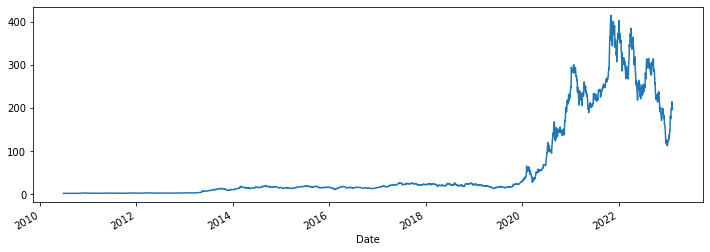

In [14]:
df_tesla['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

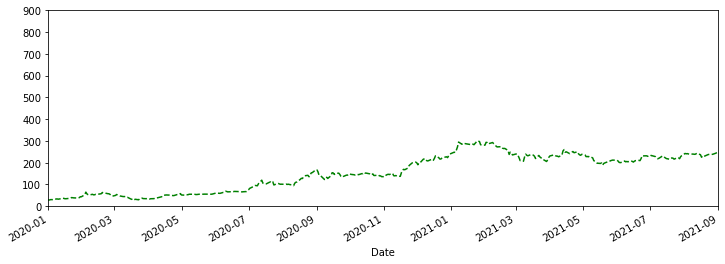

In [19]:
## xlim and ylim and coloring
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4),ls='--',c='green')

In [24]:
index= df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open = df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [25]:
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline


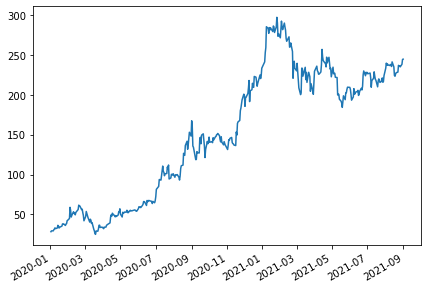

In [29]:
figure,axis = plt.subplots()
#preventing overlapping
figure.autofmt_xdate()
plt.tight_layout()
axis.plot(index,share_open)

In [30]:
## DateTime Index

In [34]:
df_tesla= df_tesla.reset_index()

In [35]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3179 non-null   datetime64[ns]
 1   Open       3179 non-null   float64       
 2   High       3179 non-null   float64       
 3   Low        3179 non-null   float64       
 4   Close      3179 non-null   float64       
 5   Adj Close  3179 non-null   float64       
 6   Volume     3179 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 174.0 KB


In [38]:
df_tesla.set_index('Date',drop=True)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-02-07,196.429993,197.500000,189.550003,196.809998,196.809998,186010300
2023-02-08,196.100006,203.000000,194.309998,201.289993,201.289993,180673600
2023-02-09,207.779999,214.000000,204.770004,207.320007,207.320007,215431400


In [72]:
df_tesla=df_tesla.set_index('Date',drop=True)

In [73]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [39]:
datetime.now()

datetime.datetime(2023, 2, 14, 0, 26, 0, 500872)

In [45]:
date=datetime(2023,2,14)

In [46]:
date.date()

datetime.date(2023, 2, 14)

In [47]:
date.day

14

In [48]:
date.time()

datetime.time(0, 0)

In [49]:
date.weekday()

1

In [51]:
date.year

2023

## Time Resampling

In [52]:
df_tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [74]:
df_tesla.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,1.076000,1.108667,0.998667,1.053333,1.053333,1777500
2011-12-31,1.452000,1.484667,1.407333,1.455333,1.455333,3594000
2012-12-31,1.774667,1.790000,1.509333,1.519333,1.519333,5473500
2013-12-31,2.205333,2.225333,2.140667,2.194000,2.194000,6603000
2014-12-31,9.366667,9.800000,9.111333,9.289333,9.289333,19983000
2015-12-31,12.388667,12.619333,12.093333,12.333333,12.333333,10620000
2016-12-31,9.488000,10.331333,9.403333,9.578000,9.578000,24892500
2017-12-31,14.316667,14.688667,14.064000,14.466000,14.466000,32800500
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500


In [75]:
df_tesla.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-31,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-31,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


<AxesSubplot:xlabel='Date'>

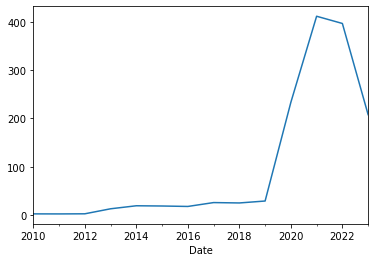

In [77]:
## rule A is year and frequency
df_tesla.resample(rule='A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

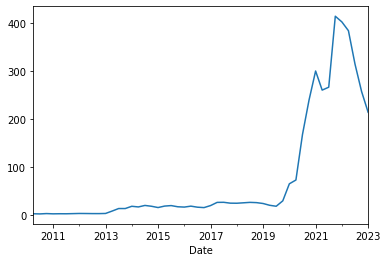

In [79]:
## Quaterly start frequency
df_tesla.resample(rule='QS').max()['High'].plot()

In [80]:
## Buisness End Frequency
df_tesla.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-30,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-30,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-29,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


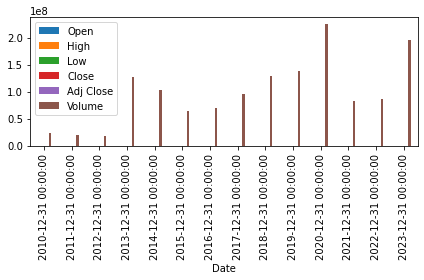

In [82]:
## Plotting
df_tesla.resample(rule='A').mean().plot(kind='bar')
plt.tight_layout()

<AxesSubplot:xlabel='Date'>

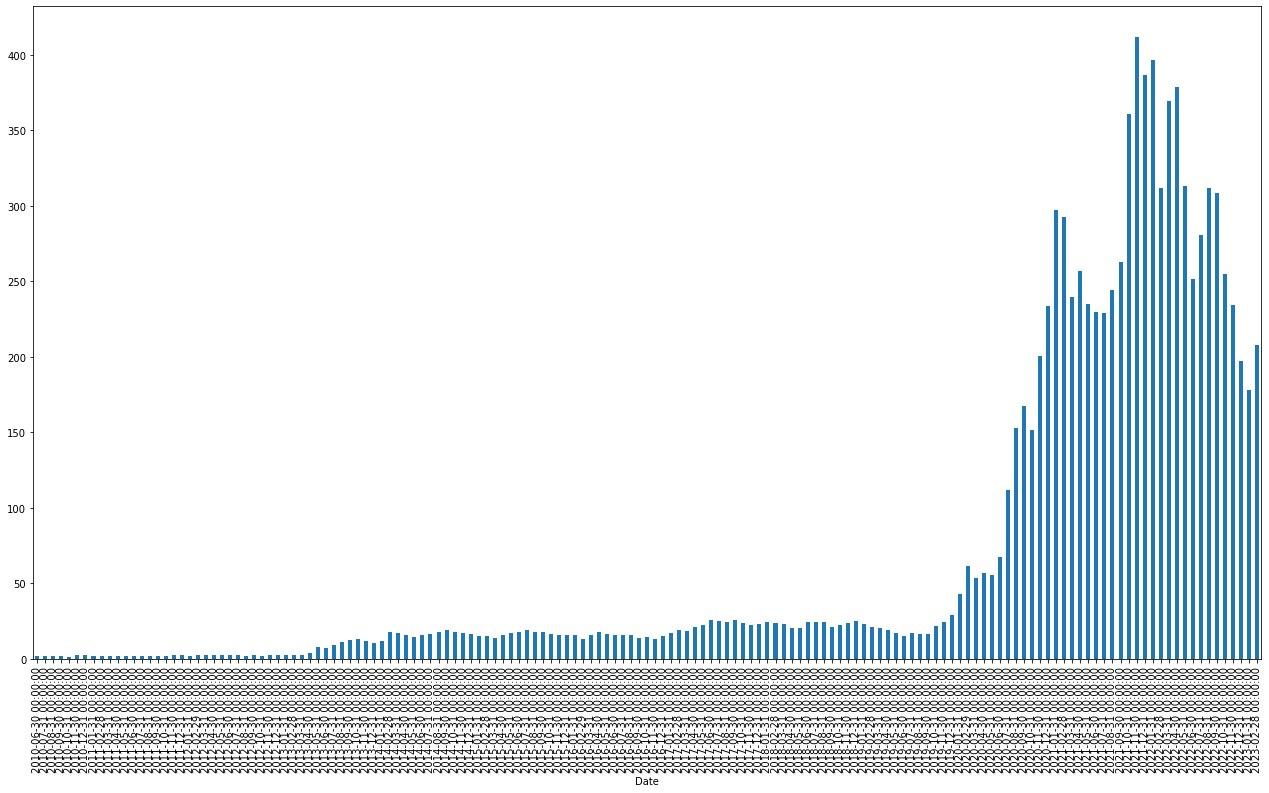

In [90]:
## Monthly
df_tesla['Open'].resample(rule='M').max().plot(kind='bar',figsize=(22,12))

In [91]:
df_tesla['High'].rolling(11).mean()

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
                 ...    
2023-02-07    178.573636
2023-02-08    183.710000
2023-02-09    189.854545
2023-02-10    193.925454
2023-02-13    195.345455
Name: High, Length: 3179, dtype: float64

In [102]:
df_tesla['High'].

414.4966735839844

In [103]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-02-07,196.429993,197.500000,189.550003,196.809998,196.809998,186010300
2023-02-08,196.100006,203.000000,194.309998,201.289993,201.289993,180673600
2023-02-09,207.779999,214.000000,204.770004,207.320007,207.320007,215431400


# ASSIGNMENT 

## 1. Read the Microsoft Data using Pandas Data reader

In [104]:
df_msft = yfin.download('MSFT')

[*********************100%***********************]  1 of 1 completed


In [147]:
df_msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060809,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062980,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064067,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062437,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061351,47894400


## 2. Get the maximum price of the share from 2017 to 2022

In [150]:
df_msft.loc['2017-01-01':'2021-12-31']['Close'].max()


343.1099853515625

In [146]:
df_msft.loc['2021-11-22']['High']

349.6700134277344

## 3. Which is the date of the highest price of the stock?

In [142]:
df_msft.idxmax()

Open        2021-11-22
High        2021-11-22
Low         2021-11-19
Close       2021-11-19
Adj Close   2021-11-19
Volume      1986-03-13
dtype: datetime64[ns]

## 4. Which is the date of the lowest price of the stock?

In [143]:
df_msft.idxmin()

Open        1986-03-13
High        1986-03-25
Low         1986-03-13
Close       1986-03-24
Adj Close   1986-03-24
Volume      1986-06-11
dtype: datetime64[ns]